In [1]:
!pip install pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Large Dataset Analysis") \
    .getOrCreate()


In [10]:
import urllib.request

# Step 1: Download the CSV file
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
local_path = "/tmp/titanic.csv"
urllib.request.urlretrieve(url, local_path)

# Step 2: Read the downloaded file with PySpark
df = spark.read.csv(local_path, header=True, inferSchema=True)
df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [11]:
df.printSchema()
df.describe().show()
df = df.dropna(subset=["Age", "Fare"])  # drop rows with nulls in important columns


root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+--------------

In [12]:
df.groupBy("Sex").avg("Age").show()


+------+------------------+
|   Sex|          avg(Age)|
+------+------------------+
|female|27.915708812260537|
|  male| 30.72664459161148|
+------+------------------+



In [13]:
from pyspark.sql.functions import avg

df.groupBy("Pclass").agg(avg("Survived").alias("Survival Rate")).show()


+------+-------------------+
|Pclass|      Survival Rate|
+------+-------------------+
|     1| 0.6559139784946236|
|     3|0.23943661971830985|
|     2| 0.4797687861271676|
+------+-------------------+



In [14]:
pandas_df = df.toPandas()  # sample if large
sample_df = df.sample(False, 0.1).toPandas()  # 10% of the data


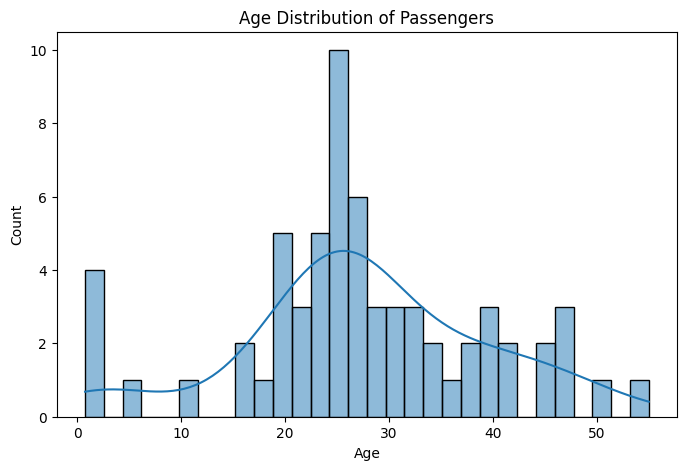

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(sample_df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<ipython-input-16-8f007a4f3db2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df, x="Pclass", palette="Set2")


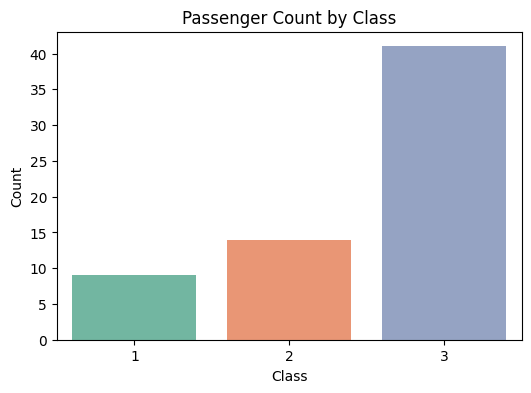

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=sample_df, x="Pclass", palette="Set2")
plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


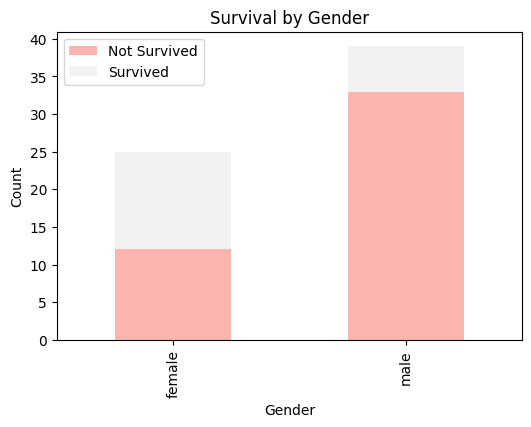

In [17]:
import pandas as pd

grouped = sample_df.groupby(["Sex", "Survived"]).size().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Pastel1")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()


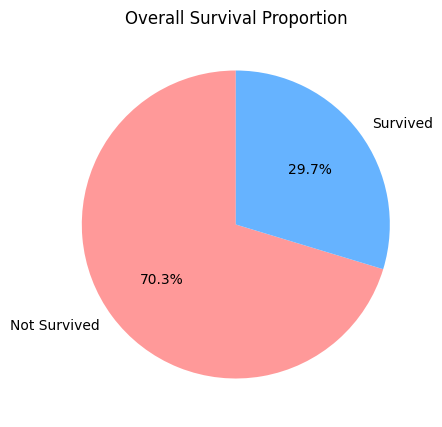

In [18]:
survival_counts = sample_df["Survived"].value_counts()
labels = ["Not Survived", "Survived"]
colors = ["#ff9999","#66b3ff"]

plt.figure(figsize=(5, 5))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Overall Survival Proportion")
plt.show()


<ipython-input-19-fe3a721323a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_df, x="Pclass", y="Fare", palette="Set3")


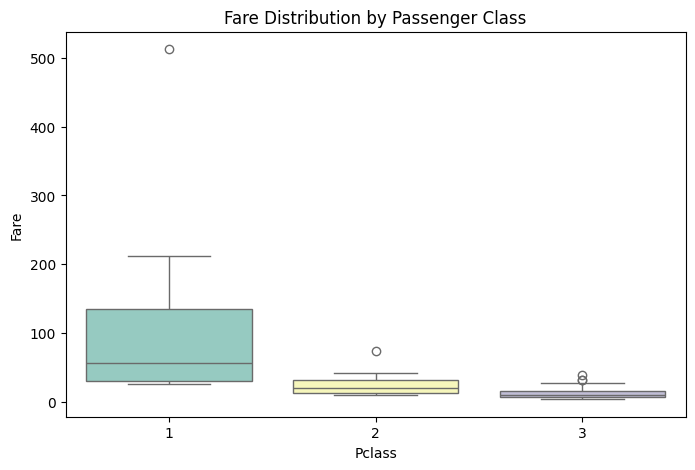

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=sample_df, x="Pclass", y="Fare", palette="Set3")
plt.title("Fare Distribution by Passenger Class")
plt.show()


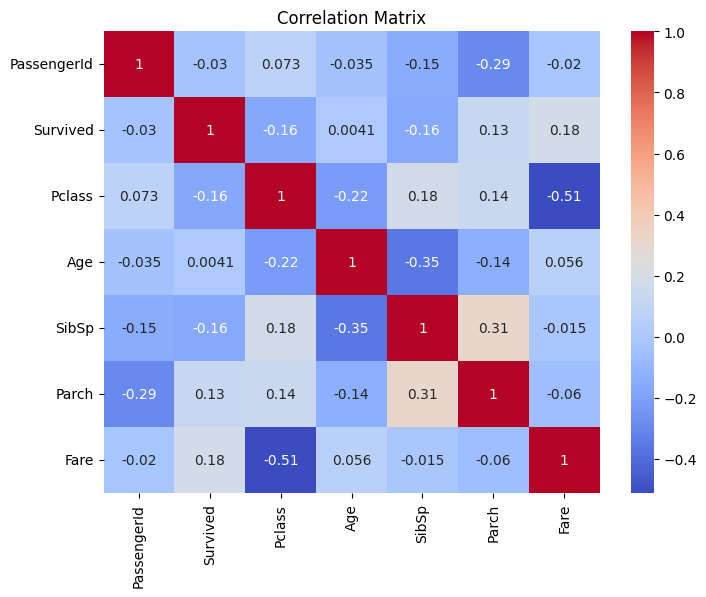

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(sample_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


<ipython-input-21-6313ebbff99c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sample_df, x="Survived", y="Age", palette="Set1")


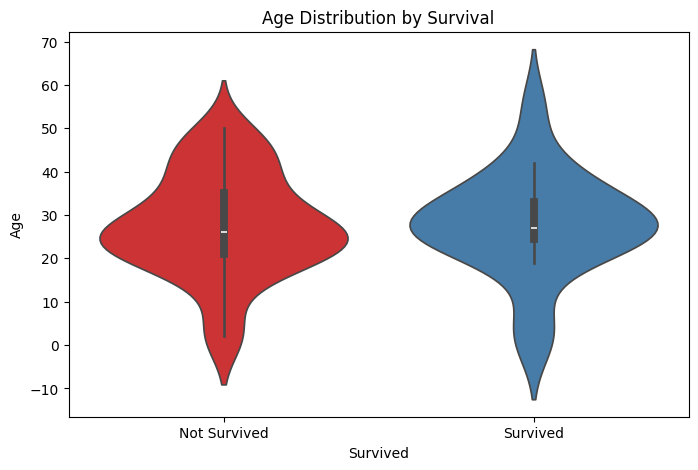

In [21]:
plt.figure(figsize=(8,5))
sns.violinplot(data=sample_df, x="Survived", y="Age", palette="Set1")
plt.title("Age Distribution by Survival")
plt.xticks([0,1], ["Not Survived", "Survived"])
plt.show()
